In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_std_feat(x):
    return (x - x.mean())/x.std()

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X_st[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [5]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

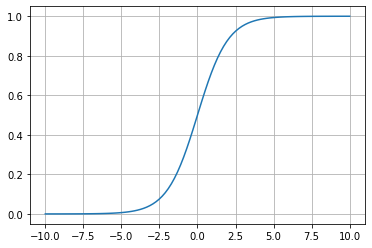

In [6]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))
plt.grid()
plt.plot(dots, sigmoid_value);

In [7]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return err

In [8]:
def eval_model_logreg(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [9]:
W = eval_model_logreg(X_st, y, iterations=25000, alpha=1e-0)

2500 [-18.31764414  -2.04856375  -4.52708874  15.19228685] 0.19390243306466634
5000 [-26.0937231   -2.7307529   -6.81720322  21.49765648] 0.15090120005015614
7500 [-31.59798266  -3.21692572  -8.41100105  25.94721672] 0.12960482586400426
10000 [-35.907977    -3.59554341  -9.65060282  29.4178451 ] 0.11663474835747886
12500 [-39.49182502  -3.90685783 -10.67930205  32.29154567] 0.10771109660127542
15000 [-42.59127593  -4.17216434 -11.56950237  34.76580371] 0.10106445661346644
17500 [-45.34622871  -4.40399802 -12.3624602   36.95502   ] 0.09583301669667077
20000 [-47.84444435  -4.61034064 -13.08373895  38.93106184] 0.09154635956227136
22500 [-50.1443636   -4.7965915  -13.75017686  40.74188723] 0.08792534173525937
25000 [-52.28671965  -4.96658396 -14.37338788  42.4210246 ] 0.08479343466760672


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [10]:
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(- np.dot(W, X)))
    return y_pred_proba

In [11]:
calc_pred_proba(W, X_st)

array([0.32032983, 0.00125334, 1.        , 0.02374222, 0.97276276,
       0.00920904, 1.        , 0.00622652, 0.67477262, 1.        ])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [12]:
def calc_pred(W, X):
    y_pred = list()
    y_pred_proba = calc_pred_proba(W, X)
    for i in y_pred_proba:
        if i < 0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [13]:
y_pred = calc_pred(W, X_st)
print(y_pred, y, sep='\n')

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [14]:
def accuracy(y, y_pred):
    right_answers = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            right_answers += 1
    if right_answers:
        accuracy = len(y) / right_answers
    else:
        accuracy = 0
    return accuracy
accuracy(y, y_pred)

1.0

In [15]:
def err_matrix(y, y_pred):
    err_matrix = [[0, 0],
                  [0, 0]]
    for i in range(len(y)):
        if y[i] == y_pred[i] and y[i] == 1:
            err_matrix[0][0] += 1
        elif y[i] == y_pred[i] and y[i] == 0:
            err_matrix[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1:
            err_matrix[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 0:
            err_matrix[1][0] += 1
    return err_matrix
error_matrix = err_matrix(y, y_pred)

In [16]:
def precision(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[0][1])
precision = precision(error_matrix)

In [17]:
def recall(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[1][0])
recall = recall(error_matrix)

In [18]:
def f1_score(b):
    score = (1 + b**2) * ((precision * recall)/(b**2 * precision + recall))
    return score
f1_score(1)

1.0

### 6. Могла ли модель переобучиться? Почему?

#### Нет, в таком случае значения точности и полноты  отличались бы, соответственно f1_score тоже бы не равнялся 1